In [ ]:
#Unit 7: Assignment - Distinguishing Sentiments

In [2]:
#Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter API Keys
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
#Target users
target_users = ("@BBC", "@CBS", "@CNN", "@Fox", "@NYTimes")

#Counter
counter = 1

#Variables for holding sentiments
sentiments = []

#Loop through all target users
for target in target_users:
    
    #variable for holding oldest tweet
    oldest_tweet = None
    
    #Variable for holding sentiments
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    #Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        #Get tweets from home feed
        public_tweets = api.user_timeline(target, page=x)

        #Loop through tweets 
        for tweet in public_tweets:

            #Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
        
            #Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
            #Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"], 
                           "Username": target,
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago": counter})
            
            
        
            #Add to counter 
            counter += 1

In [7]:
#Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,Username
0,0.5994,Thu Apr 12 20:58:00 +0000 2018,0.000,0.642,0.358,1,@BBC
1,0.3818,Thu Apr 12 20:11:00 +0000 2018,0.000,0.822,0.178,2,@BBC
2,0.7184,Thu Apr 12 19:01:05 +0000 2018,0.000,0.739,0.261,3,@BBC
3,0.4404,Thu Apr 12 18:03:09 +0000 2018,0.000,0.861,0.139,4,@BBC
4,-0.4215,Thu Apr 12 17:02:01 +0000 2018,0.189,0.811,0.000,5,@BBC


In [8]:
#Save dataframe as csv
sentiments_pd.to_csv("NewsMood.csv", encoding="utf-8", index=False)

ValueError: x and y must be the same size

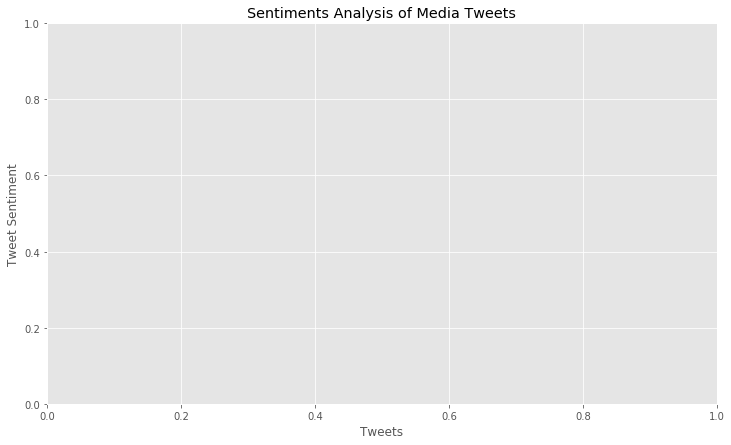

In [9]:
#Create scatter plot
plt.figure(figsize=(12,7))
plt.title("Sentiments Analysis of Media Tweets")
plt.xlabel("Tweets")
plt.ylabel("Tweet Sentiment")
plt.grid(True)

plt.scatter(x=x,
            y=sentiments_pd[sentiments_pd.Username == '@BBC']['Compound'],
            linewidth=1, marker="o", color="lightskyblue", alpha=0.8, 
            label="BBC",  edgecolor = "black")

plt.scatter(x=x, 
            y=sentiments_pd[sentiments_pd.Username == '@CBS']['Compound'],
            linewidth=1, marker="o", color="green", alpha=0.8, 
            label="CBS",  edgecolor = "black")

plt.scatter(x=x,  
            y=sentiments_pd[sentiments_pd.Username == '@CNN']['Compound'],
            linewidth=1, marker="o", color="red", alpha=0.8, 
            label="CNN",  edgecolor = "black")

plt.scatter(x=x,  
            y=sentiments_pd[sentiments_pd.Username == '@Fox']['Compound'],
            linewidth=1, marker="o", color="blue", alpha=0.8, 
            label="Fox",  edgecolor = "black")

plt.scatter(x=x, 
            y=sentiments_pd[sentiments_pd.Username == '@NYTimes']['Compound'],
            linewidth=1, marker="o", color="yellow", alpha=0.8, 
            label="New York Times",  edgecolor = "black")

plt.legend(loc="best")
plt.savefig("Scatter Plot Sentiments.png")
plt.show()

In [ ]:
#Create bar plot
plt.bar(x=sentiments_pd[sentiments_pd.Username == '@BBC']['Compound'],
            color="lightskyblue", alpha=0.8, align="center") 
            

plt.title("Overall Media Sentiment Based On Twitter")
plt.xlabel("Tweets")
plt.ylabel("Tweet Sentiment")
plt.grid(True)

plt.legend(loc="best")
plt.savefig("Bar Plot Sentiments.png")
plt.show()